In [45]:
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [39]:
# File to Load
city_data = pd.read_csv("data/city_data.csv")
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [40]:
ride_data = pd.read_csv("data/ride_data.csv")
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [93]:
# Combine the data into a single dataset
city_ride=pd.merge(ride_data, city_data, how="left", on=["city", "city"])
# Display the data table for preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [107]:
# Obtain the x and y coordinates for each of the three city types
###Urban
city_ride_urban = city_ride.loc[city_ride['type']=="Urban"]
city_ride_urban_group=city_ride_urban.groupby("city")
city_ride_urban_count=pd.Series(city_ride_urban_group["city"].count())
city_ride_urban_av_fare=pd.Series(city_ride_urban_group["fare"].mean())
driver_urban_count =pd.Series(city_ride_urban_group["driver_count"].mean())

###SubUrban
city_ride_suburban = city_ride.loc[city_ride['type']=="Suburban"]
city_ride_suburban_group=city_ride_suburban.groupby("city")
city_ride_suburban_count=pd.Series(city_ride_suburban_group["city"].count())
city_ride_suburban_av_fare=pd.Series(city_ride_suburban_group["fare"].mean())
driver_suburban_count =pd.Series(city_ride_suburban_group["driver_count"].mean())

###Rural
city_ride_rural = city_ride.loc[city_ride['type']=="Rural"]
city_ride_rural_group=city_ride_rural.groupby("city")
city_ride_rural_count=pd.Series(city_ride_rural_group["city"].count())
city_ride_rural_av_fare=pd.Series(city_ride_rural_group["fare"].mean())
driver_rural_count =pd.Series(city_ride_rural_group["driver_count"].mean())

In [123]:
# Size correlates with driver count per city
driver_count=city_data.copy()
driver_count=pd.Series(driver_count.loc[:,"driver_count"])
driver_count=driver_count.sort_index()

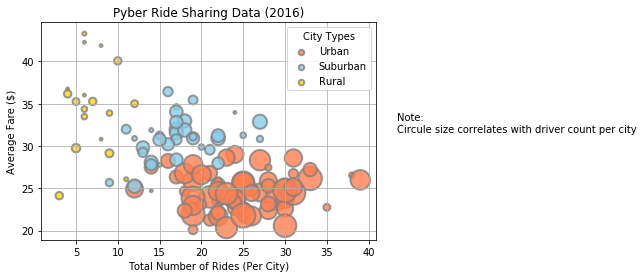

In [180]:
# Build the scatter plots for each city types
urban =  plt.scatter(city_ride_urban_count, city_ride_urban_av_fare, s=driver_urban_count*8, c="coral",alpha=0.8, edgecolors="gray", linewidth=2, label='Urban')
suburban = plt.scatter(city_ride_suburban_count, city_ride_suburban_av_fare, s=driver_suburban_count*8, c="skyblue",alpha=0.8, edgecolors="gray", linewidth=2, label='Suburban')
rural = plt.scatter(city_ride_rural_count, city_ride_rural_av_fare, s=driver_rural_count*8, c="gold",alpha=0.8, edgecolors="gray", linewidth=2, label='Rural')
lgnd= plt.legend(handles=[urban,suburban,rural], scatterpoints=1 , prop={'size': 10}, loc="upper right", title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
text="Note:" + '\n' + "Circule size correlates with driver count per city"
plt.gcf().text(0.95, 0.5, text, fontsize=10)
plt.savefig("pyber_ride_fare_bubble.png",bbox_inches="tight")
plt.show()

In [168]:
###### Total Fares by City Type
# Calculate Type Percents
city_type_group=city_ride.groupby("type")
city_fare_total=pd.DataFrame(city_type_group["fare"].sum())
city_fare_total=city_fare_total.reset_index()
city_fare_total.head()

,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


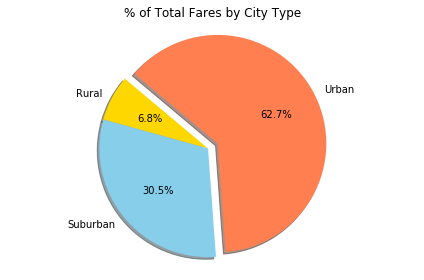

In [188]:
# Build Pie Chart
colors = ["gold","skyblue","coral"]
explode = (0,0,0.1)
plt.pie(city_fare_total["fare"], explode=explode, labels=city_fare_total["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
# Save an image of our chart and print the final product to the screen
plt.tight_layout()
plt.savefig("pyber_fares_pie.png")
plt.show()

In [170]:
######  Total Rides by City Type
# Calculate Ride Percents
city_ride_total=pd.DataFrame(city_type_group["ride_id"].count())
city_ride_total=city_ride_total.reset_index()
city_ride_total.head()

,type,ride_id
0,Rural,125
1,Suburban,625
2,Urban,1625


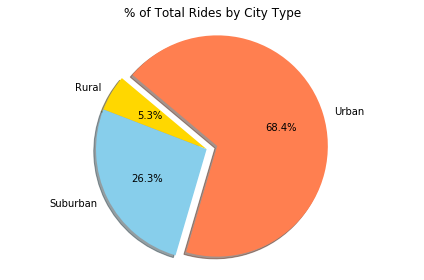

In [171]:
# Build Pie Chart
plt.pie(city_ride_total["ride_id"], explode=explode, labels=city_ride_total["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
# Save an image of our chart and print the final product to the screen
plt.tight_layout()
plt.savefig("pyber_rides_pie.png")
plt.show()

In [177]:
######  Total Drivers by City Type
# Calculate Drivers Percents
city_type_data_group=city_data.groupby("type")
city_driver_total=pd.DataFrame(city_type_data_group["driver_count"].sum())
city_driver_total=city_driver_total.reset_index()
city_driver_total.head()

,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


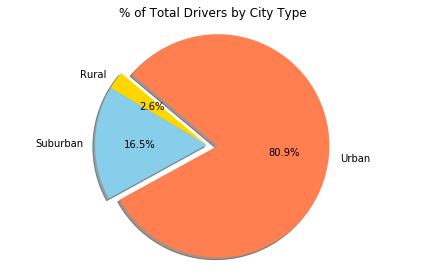

In [189]:
# Build Pie Chart
plt.pie(city_driver_total["driver_count"], explode=explode, labels=city_driver_total["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
# Save an image of our chart and print the final product to the screen
plt.tight_layout()
plt.savefig("pyber_drivers_pie.png")
plt.show()

In [ ]:
###You must include a written description of three observable trends based on the data.
#Urban cities have more drivers than suburban and rural ones, the same. The same trending apply to total drivers and fares.
#From scatter plot, rural type has the higher average fare and the less number of rides per city.
#From scatter plot, urban type has more rides per city but the average fare is less than suburban and rural categories.